In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
warnings.filterwarnings("ignore")
import matplotlib
font = {'size'   : 14}
matplotlib.rc('font', **font)

In [2]:
neg,avs,avm,avf,ri,rd = np.zeros((8,8)),np.zeros((8,8)),np.zeros((8,8)),np.zeros((8,8)),np.zeros((8,8)),np.zeros((8,8))
for m in range(8):
    for n in range(8):
        dnm = np.load('data/k3_r/m' + str(m+4) + '_n' + str(n+4) + '.npy')
        diff = dnm[:,1] - dnm[:,0]
        neg[m,n] = np.sum(diff<0)
        avs[m,n] = np.mean(dnm[:,0])
        avf[m,n] = np.mean(dnm[:,1])
        ri[m,n] = (avf[m,n] - avs[m,n]) / avs[m,n]
        
np.sum(neg)

379.0

0.9212531049050933

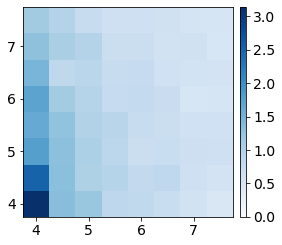

In [3]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
im = ax.imshow(ri, cmap='Blues', vmin=0, vmax=np.max(ri), origin='lower');
xtk = 3+np.arange(0,8)
ax.set_xticklabels(xtk)
ax.set_yticklabels(xtk);
div = make_axes_locatable(ax)
cax = div.append_axes("right", size="3%", pad=0.1)
plt.colorbar(im, cax=cax);
np.mean(ri)

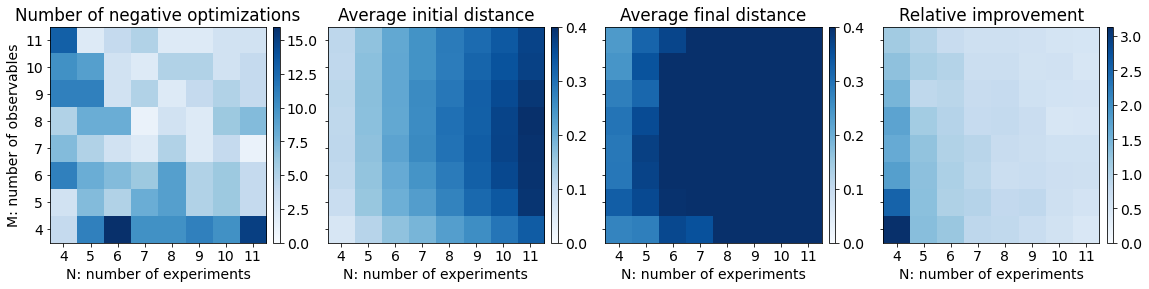

In [4]:
fig, ax = plt.subplots(1,4,figsize=(16,4),sharey=True)

im0 = ax[0].imshow(neg, cmap='Blues', vmin=0, vmax=np.max(neg), origin='lower')
ax[0].set_title('Number of negative optimizations')
im1 = ax[1].imshow(avs, cmap='Blues', vmin=0, vmax=np.max(avs), origin='lower')
ax[1].set_title('Average initial distance')
im2 = ax[2].imshow(avf, cmap='Blues', vmin=0, vmax=np.max(avs), origin='lower')
ax[2].set_title('Average final distance')
im3 = ax[3].imshow(ri, cmap='Blues', vmin=0, vmax=np.max(ri), origin='lower')
ax[3].set_title('Relative improvement')

ax[0].set_ylabel('M: number of observables');
iml = [im0,im1,im2,im3]
xtk = 4+np.arange(0,8)
for i in range(4):
    a = ax[i]
    a.set_xticks(np.arange(0,8))
    a.set_yticks(np.arange(0,8))
    a.set_xticklabels(xtk)
    a.set_yticklabels(xtk);
    a.set_xlabel('N: number of experiments')
    
    div = make_axes_locatable(a)
    cax = div.append_axes("right", size="3%", pad=0.1)
    plt.colorbar(iml[i], cax=cax);
    
fig.tight_layout()

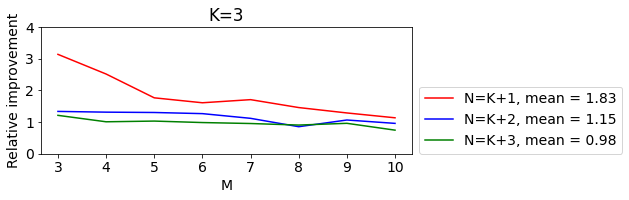

In [5]:
fig,ax = plt.subplots(1,1,figsize=(9,3))
ax.plot(3+np.arange(0,8), ri[:8,0], label='N=K+1, mean = %.2f' % np.mean(ri[:,0]), color = 'r')
ax.plot(3+np.arange(0,8), ri[:8,1], label='N=K+2, mean = %.2f' % np.mean(ri[:,1]), color = 'b')
ax.plot(3+np.arange(0,8), ri[:8,2], label='N=K+3, mean = %.2f' % np.mean(ri[:,2]), color = 'g')
ax.legend(loc=(1.02,0))
ax.set_ylim(0,4);
ax.set_ylabel('Relative improvement');
ax.set_xlabel('M');
ax.set_title('K=3')
fig.tight_layout()

In [6]:
fig.savefig('figures/k3-lines-r.pdf')

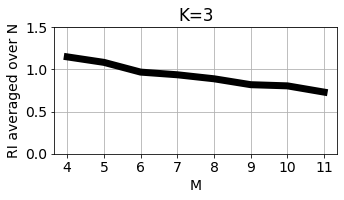

In [7]:
xtk = np.arange(4,12)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(xtk, np.mean(ri[:,:], axis=1), color = 'k', lw=7)
#ax.legend(loc=(1.02,0))
ax.set_ylim(0,1.5);
ax.set_ylabel('RI averaged over N');
ax.set_xlabel('M');
ax.set_title('K=3')
ax.set_xticks(xtk)
ax.grid(True)
fig.tight_layout()

In [8]:
fig.savefig('figures/k3-average-r.pdf')

In [9]:
np.mean(ri, axis=1)

array([1.14690632, 1.08184602, 0.96669993, 0.93514927, 0.88770714,
       0.81784926, 0.80394303, 0.72992387])

In [10]:
np.save('data/ri/ri3_r.npy', ri)
print(ri)

[[3.13816467 1.33762596 1.21326222 0.86728003 0.82304711 0.72650997
  0.60184289 0.46751774]
 [2.51764879 1.31427857 1.0102784  0.94825348 0.81095844 0.83762399
  0.6473556  0.5683709 ]
 [1.76634829 1.30363892 1.03241277 0.87393414 0.70971375 0.72541161
  0.67262464 0.64951534]
 [1.61040619 1.26748362 0.98608045 0.91485368 0.73699415 0.70451235
  0.63504202 0.62582169]
 [1.70875719 1.11931808 0.95566464 0.77805946 0.80147714 0.71674676
  0.49766147 0.52397237]
 [1.45916876 0.85483371 0.90689801 0.75265186 0.77435053 0.63357248
  0.58614871 0.57517004]
 [1.28912233 1.06643633 0.96195076 0.69328429 0.68931624 0.59775032
  0.61962593 0.51405801]
 [1.13614499 0.96010509 0.74632986 0.66128773 0.64460082 0.61396804
  0.54230755 0.53464686]]
